<a href="https://colab.research.google.com/github/jocelyndunstan/MA5406/blob/main/Clase5_2NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Expresiones regulares

In [2]:
import re

## Ejemplo 1

In [3]:
text0 = '2019-03-21'
text1 = '21-03-2019'
m = re.search(r'\d{4}-\d{2}-\d{2}', text0)
bool(m)

True

In [4]:
sentence = 'la fecha de hoy es 2019-03-21-5'
m = re.search(r'(\d{4}-\d{2}-\d{2})', sentence)
m.group(1)

'2019-03-21'

In [5]:
sentence = 'la fecha de hoy es 2019-03-21 y es dia jueves y hace calor'
m = re.search(r'(\d{4}-\d{2}-\d{2}).*dia (\w+)', sentence)
print('fecha: %s' % m.group(1))
print('dia: %s' % m.group(2))

fecha: 2019-03-21
dia: jueves


In [6]:
sentence = '''
la fecha de hoy es 2019-03-21 y es dia jueves
la fecha de hoy es 2019-03-21 y estamos a viernes
la fecha de hoy es 2019-03-24 y es dia sabado
'''
matches = re.finditer(r'(\d{4}-\d{2}-\d{2}).*dia (\w+)', sentence, re.MULTILINE)
for match in matches:
    print('fecha: %s, dia: %s' % (match.group(1), match.group(2)))
    #print(match)

fecha: 2019-03-21, dia: jueves
fecha: 2019-03-24, dia: sabado


In [7]:
sentence = '''
la fecha de hoy es 2019-03-21 y es dia jueves
la fecha de hoy es 2019-03-21 y estamos a  viernes santo
la fecha de hoy es 2019-03-24 y es dia sabado
'''
matches = re.finditer(r'(\d{4}-\d{2}-\d{2}).* (\w+)$', sentence, re.MULTILINE)
for match in matches:
    print('fecha: %s, dia: %s' % (match.group(1), match.group(2)))
    #print(match)

fecha: 2019-03-21, dia: jueves
fecha: 2019-03-21, dia: santo
fecha: 2019-03-24, dia: sabado


www.regex101.com es una super ayuda! 

![Titulo](regex2.png)

## Ejemplo 2

In [8]:
info = '''
RUN 15872789-5 y fecha de nacimiento 26/12/1985
'''

In [9]:
matches = re.finditer(r'(\d+)', info, re.MULTILINE)
for match in matches:
    print('rut: %s' % match.group(1))

rut: 15872789
rut: 5
rut: 26
rut: 12
rut: 1985


In [10]:
matches = re.finditer(r'(\d{8})-(\d)', info, re.MULTILINE)
for match in matches:
    print('rut: %s, digito verificador: %s' % (match.group(1), match.group(2)))

rut: 15872789, digito verificador: 5


In [11]:
info = '''
Mi RUN 15872789-5 y fecha de nacimiento 26/12/1985
y el de mi mama es 9672455-4
'''

In [12]:
matches = re.finditer(r'(\d{8}|\d{7})-(\d)', info, re.MULTILINE)
for match in matches:
    print('rut: %s, digito verificador: %s' % (match.group(1), match.group(2)))

rut: 15872789, digito verificador: 5
rut: 9672455, digito verificador: 4


## Ejemplo 3

In [13]:
texto = "el papa del Papa se llama Francisco"

In [14]:
matches = re.finditer(r'papa', texto)
#bool(matches)
for match in matches:
    print(match.group())

papa


In [15]:
matches = re.finditer(r'papa', texto, re.IGNORECASE)
#bool(matches)
for match in matches:
    print(match.group())

papa
Papa


## Ejemplo 4

Cuando se quiere buscar la palabra psoriasis (pero que podría estar mal escrita) y se recorre un dataframe de Pandas:

pattern = r'p?soriasis'

psoriasis = consolidated[consolidated.SOSPECHA_DIAG.str.contains(pattern, case=False)]
print(psoriasis.shape)

## Ejemplo 5: invéntenlo ustedes!

# Pre-procesamiento standard

In [18]:
import nltk
from nltk.tokenize import word_tokenize
from unidecode import unidecode

[nltk_data] Error loading word_tokenize: Package 'word_tokenize' not
[nltk_data]     found in index


ModuleNotFoundError: ignored

Leo un dictamen que fue scaneado y luego procesado con OCR

In [17]:
https://raw.githubusercontent.com/jocelyndunstan/MA5406/main/dictamen.txt



#f = open('dictamen.txt')
f = open('dictamen.txt', encoding="ISO-8859-1")
raw = f.read()
f.close()

FileNotFoundError: ignored

In [ ]:
raw

'SUPCJ~Tl!~liEKfl,\\ \nVAL01r;$ YSEGl.l:ltU~ \n1\nOFORD.: N"6887 \nOficio N"2162, de 26/01/2011, de la !\nAn ecedentes .: Superintendencia de Pensiones. \ni \nInstruye reincorporación de beneficiaria ¿pensión\nMateria.: de sobrevivencia. SGD.: N"2011030043591 Santiago, 1Ode Marzo de 2011 \nDe: SuperintendenJia de Valores y Seguros \nA : ~~;~~~~~~~ .\nSEGUROS DE VIDA S. EL BOSQUE NORTE 0125 LAS CONDES fcomuna: SANTIAGO -Ciudad: SANTIAGO -Reg. Me rrolitana \n----------IT__________ --------1 \ni \nSe ha recibido el oficio del antecedente, el cual se ~djuntu, en que la Superintendencia de Pensiones señal~ que la AFP I-labitat y esa aseg~radora incurrieron en un errbr ~l eliminar de la póliza de renta vitalicia previsiona.lld,el Sr.\x95.:.-. \xadl f·--~ -\n.a lalbefieficiaria de pensión de sobrevivencia, Sra . ,__ ~· _.. :; ·..i· _. . ._ \n. i . y (iue en consecuencia ésta debb ser restituida en calidad de beneficiaria como Madr~ de Hijo de \nFiliación no fyfatri onial debido a que su matri

El enconding suele ser un dolor de cabeza! No tengo un conocimiento acabado, y a continuación sólo muestro dos ejemplos de cómo he agregado libros con distintos formatos:

corpus_raw = u""

for book_filename in book_filenames:
    with codecs.open(book_filename, 'r','iso-8859-1') as book_file:
        corpus_raw += book_file.read()

with codecs.open("RAE/dict.txt", 'r','utf-8') as book_file:
        corpus_raw += book_file.read()

### Separo el texto en palabras, las paso a minusculas, y reemplazo todos los caracteres no-alfabeticos dentro de las palabras


In [ ]:
v1 = nltk.word_tokenize(raw)
v2 = [w.lower() for w in v1]
v22 = []
for word in v2:
    word = re.sub('[^A-Za-z]', '', word)
    if len(word) == 0:
        pass
    else:
        v22.append(word)

In [ ]:
v22

['supcjtl',
 'liekfl',
 'valr',
 'ysegll',
 'ltu',
 'oford',
 'n',
 'oficio',
 'n',
 'de',
 'de',
 'la',
 'an',
 'ecedentes',
 'superintendencia',
 'de',
 'pensiones',
 'i',
 'instruye',
 'reincorporacin',
 'de',
 'beneficiaria',
 'pensin',
 'materia',
 'de',
 'sobrevivencia',
 'sgd',
 'n',
 'santiago',
 'ode',
 'marzo',
 'de',
 'de',
 'superintendenjia',
 'de',
 'valores',
 'y',
 'seguros',
 'a',
 'seguros',
 'de',
 'vida',
 's',
 'el',
 'bosque',
 'norte',
 'las',
 'condes',
 'fcomuna',
 'santiago',
 'ciudad',
 'santiago',
 'reg',
 'me',
 'rrolitana',
 'it',
 'i',
 'se',
 'ha',
 'recibido',
 'el',
 'oficio',
 'del',
 'antecedente',
 'el',
 'cual',
 'se',
 'djuntu',
 'en',
 'que',
 'la',
 'superintendencia',
 'de',
 'pensiones',
 'seal',
 'que',
 'la',
 'afp',
 'ilabitat',
 'y',
 'esa',
 'asegradora',
 'incurrieron',
 'en',
 'un',
 'errbr',
 'l',
 'eliminar',
 'de',
 'la',
 'pliza',
 'de',
 'renta',
 'vitalicia',
 'previsionalld',
 'el',
 'sr',
 'l',
 'f',
 'a',
 'lalbefieficiaria',
 

Podría querer sacar tildes

In [ ]:
v3 = []
for i in range(len(v22)): 
    v3.append(unidecode(v22[i]))
v3 

['supcjtl',
 'liekfl',
 'valr',
 'ysegll',
 'ltu',
 'oford',
 'n',
 'oficio',
 'n',
 'de',
 'de',
 'la',
 'an',
 'ecedentes',
 'superintendencia',
 'de',
 'pensiones',
 'i',
 'instruye',
 'reincorporacin',
 'de',
 'beneficiaria',
 'pensin',
 'materia',
 'de',
 'sobrevivencia',
 'sgd',
 'n',
 'santiago',
 'ode',
 'marzo',
 'de',
 'de',
 'superintendenjia',
 'de',
 'valores',
 'y',
 'seguros',
 'a',
 'seguros',
 'de',
 'vida',
 's',
 'el',
 'bosque',
 'norte',
 'las',
 'condes',
 'fcomuna',
 'santiago',
 'ciudad',
 'santiago',
 'reg',
 'me',
 'rrolitana',
 'it',
 'i',
 'se',
 'ha',
 'recibido',
 'el',
 'oficio',
 'del',
 'antecedente',
 'el',
 'cual',
 'se',
 'djuntu',
 'en',
 'que',
 'la',
 'superintendencia',
 'de',
 'pensiones',
 'seal',
 'que',
 'la',
 'afp',
 'ilabitat',
 'y',
 'esa',
 'asegradora',
 'incurrieron',
 'en',
 'un',
 'errbr',
 'l',
 'eliminar',
 'de',
 'la',
 'pliza',
 'de',
 'renta',
 'vitalicia',
 'previsionalld',
 'el',
 'sr',
 'l',
 'f',
 'a',
 'lalbefieficiaria',
 

Otra posible forma de remover tildes

In [ ]:
def tildeRemover(text):
    try:
#         text = text.lower()
        text = text.replace('á','a')
        text = text.replace('é','e')
        text = text.replace('í','i')
        text = text.replace('ó','o')
        text = text.replace('ú','u')
        return text
    except:
        return text

In [ ]:
v4 = []
for i in range(len(v22)): 
    v4.append(tildeRemover(v22[i]))
v4

['supcjtl',
 'liekfl',
 'valr',
 'ysegll',
 'ltu',
 'oford',
 'n',
 'oficio',
 'n',
 'de',
 'de',
 'la',
 'an',
 'ecedentes',
 'superintendencia',
 'de',
 'pensiones',
 'i',
 'instruye',
 'reincorporacin',
 'de',
 'beneficiaria',
 'pensin',
 'materia',
 'de',
 'sobrevivencia',
 'sgd',
 'n',
 'santiago',
 'ode',
 'marzo',
 'de',
 'de',
 'superintendenjia',
 'de',
 'valores',
 'y',
 'seguros',
 'a',
 'seguros',
 'de',
 'vida',
 's',
 'el',
 'bosque',
 'norte',
 'las',
 'condes',
 'fcomuna',
 'santiago',
 'ciudad',
 'santiago',
 'reg',
 'me',
 'rrolitana',
 'it',
 'i',
 'se',
 'ha',
 'recibido',
 'el',
 'oficio',
 'del',
 'antecedente',
 'el',
 'cual',
 'se',
 'djuntu',
 'en',
 'que',
 'la',
 'superintendencia',
 'de',
 'pensiones',
 'seal',
 'que',
 'la',
 'afp',
 'ilabitat',
 'y',
 'esa',
 'asegradora',
 'incurrieron',
 'en',
 'un',
 'errbr',
 'l',
 'eliminar',
 'de',
 'la',
 'pliza',
 'de',
 'renta',
 'vitalicia',
 'previsionalld',
 'el',
 'sr',
 'l',
 'f',
 'a',
 'lalbefieficiaria',
 

Claramente necesitamos más procesamiento para estudiar este archivo!

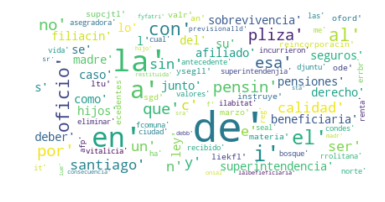

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str(v4))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Usando la clase pasada, pueden sacar los símbolos no-numéricos y stopwords?